john fredy beltran cuellar

date 08/23/2025


## Hypothesis testing problems  
Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

|Diet 1 |Diet 2 |
|-------|-------|
|2.0    |	3.0 |
|2.5    |	3.2 |
|3.0    |	3.1 |
|2.8    |	2.9 |
|2.3    |	2.8 |
|2.7    |   3.0 |
|2.5    |	3.2 |  

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

    State the hypothesis: null and alternative hypothesis.
    Perform the test to test the hypothesis. You can use a Student's t-test.
    Analyze the conclusions.


### ANOVA

ANOVA (Analysis of Variance) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

    Between-group variability: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
    Within-group variability: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:
- Null hypothesis ($H_{0}$) he means of all groups are equal.
- Alternative hypothesis ($H_{1}$) at least one group mean is different.
If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats as stats

In [17]:
# Datos de las dos dietas
diet1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5], dtype=float)
diet2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2], dtype=float)

# === Prueba t de Student (asumiendo varianzas iguales) ===
t_stat, p_value = stats.ttest_ind(diet1, diet2, equal_var=True)
print("=== t-test (Student) ===")
print(f"t = {t_stat:.4f}")
print(f"p-valor = {p_value:.4f}")


=== t-test (Student) ===
t = -3.5383
p-valor = 0.0041


## Conclusión ejercicio 1:

Existe evidencia estadísticamente significativa de que las medias de peso entre las dos dietas no son iguales   
(
𝑝
<
0.05
p<0.05).

esto quiere decir que:

Los participantes de la dieta 2 presentan un peso promedio significativamente mayor que los de la dieta 1, lo que sugiere que la dieta 2 podría ser menos efectiva para reducir peso.

## Exercise 2  
A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

|Fertilizer 1|	Fertilizer 2|	Fertilizer 3|
|-|-|-|
|20|22|24|
|21|21|23|
|20|23|22|
|19|22|23|
|20|21|24|

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

State the hypothesis: null and alternative hypothesis.
Perform the ANOVA test.
Analyze the conclusions.
If one fertilizer is better than another, how can we know it?

In [18]:
fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

# ANOVA test
f_value, p_value = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print(f"f-value: {f_value}")
print(f"p-value: {p_value}")

f-value: 20.31578947368421
p-value: 0.000140478247931904


## conclucion primera parte ejercicio 2

Los tres fertilizantes no producen el mismo rendimiento promedio.
Hay diferencias significativas entre al menos dos de ellos.

## usaremos turkey HSD:

para identificar que pares de grupos de fertilizantes son significativamente diferentes.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


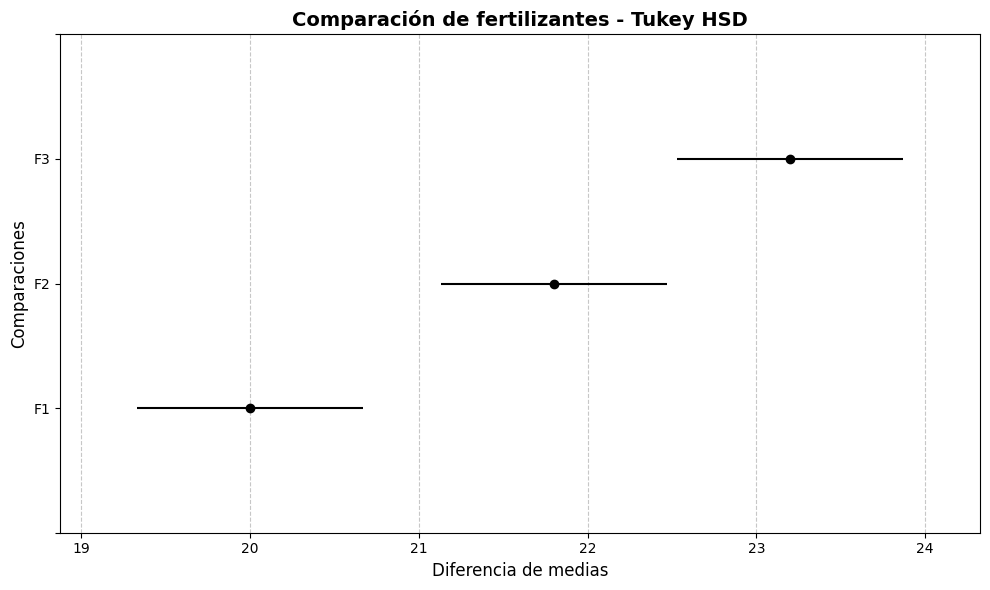

In [19]:
# Datos
fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

# Unimos los datos y creamos etiquetas
data = fertilizer_1 + fertilizer_2 + fertilizer_3
groups = (["F1"] * len(fertilizer_1) +
          ["F2"] * len(fertilizer_2) +
          ["F3"] * len(fertilizer_3))

# Tukey HSD
mc = MultiComparison(data, groups)
tukey_result = mc.tukeyhsd(alpha=0.05)

# Imprimir resultados
print(tukey_result)

# Gráfico estético
fig, ax = plt.subplots(figsize=(8, 5))
tukey_result.plot_simultaneous(ax=ax)

# Personalización
ax.set_title("Comparación de fertilizantes - Tukey HSD", fontsize=14, fontweight='bold')
ax.set_xlabel("Diferencia de medias", fontsize=12)
ax.set_ylabel("Comparaciones", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## conclucion segunda parte:

El fertilizante F3 produjo el mayor rendimiento promedio, seguido de F2, y luego F1. Todos los fertilizantes son significativamente diferentes entre sí.